Question1




In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import seaborn as sns

In [ ]:
cust = pd.read_csv('/content/Mall_Customers (1).csv')
print(cust)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


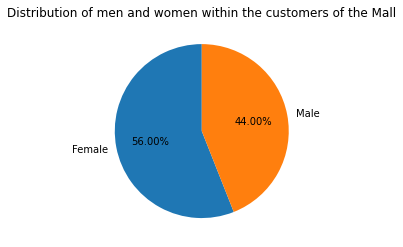

In [ ]:
gender=cust.Gender.value_counts()
gender_label=['Female','Male']
plt.pie(gender, labels=gender_label, autopct='%0.2f%%',startangle=90)
plt.title('Distribution of men and women within the customers of the Mall')
plt.show()

Question 2

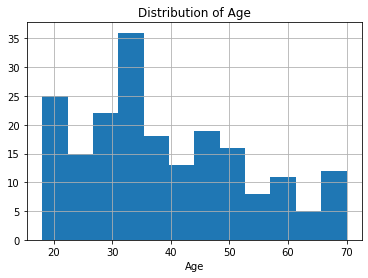

In [ ]:
cust.hist('Age', bins=12);
plt.title('Distribution of Age');
plt.xlabel('Age');

Question 3

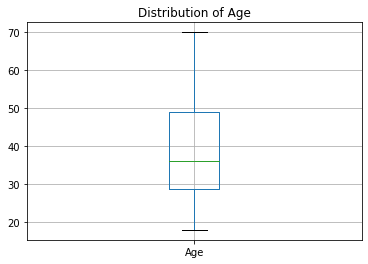

In [ ]:
cust.boxplot("Age")
plt.title('Distribution of Age');

Question 4

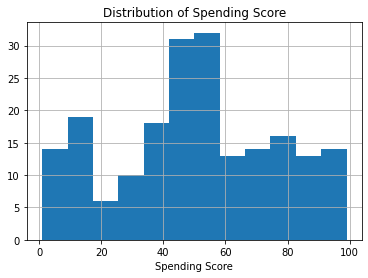

In [ ]:
cust.hist('Spending Score (1-100)', bins=12);
plt.title('Distribution of Spending Score');
plt.xlabel('Spending Score');

Question 5

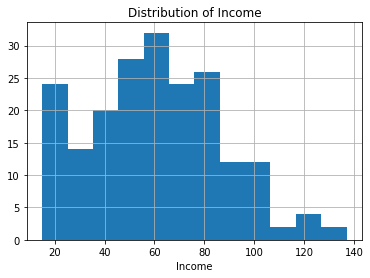

In [ ]:
cust.hist('Annual Income (k$)', bins=12);
plt.title('Distribution of Income');
plt.xlabel('Income');

Question 6

In [ ]:
x=cust.iloc[:,[3, 4]].values

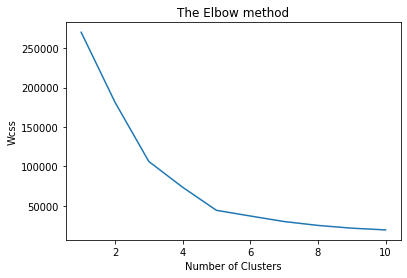

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [ ]:
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


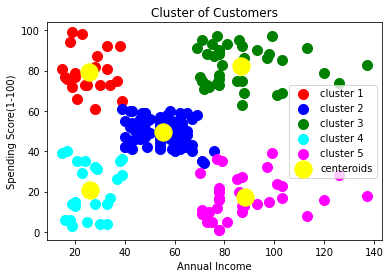

In [ ]:
plt.scatter(x[y_kmeans==0, 0],x[y_kmeans==0, 1], s=100,c='red', label='cluster 1')
plt.scatter(x[y_kmeans==1, 0],x[y_kmeans==1, 1], s=100,c='blue', label='cluster 2')
plt.scatter(x[y_kmeans==2, 0],x[y_kmeans==2, 1], s=100,c='green', label='cluster 3')
plt.scatter(x[y_kmeans==3, 0],x[y_kmeans==3, 1], s=100,c='cyan', label='cluster 4')
plt.scatter(x[y_kmeans==4, 0],x[y_kmeans==4, 1], s=100,c='magenta',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow', label='centeroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()